# Review

In [1]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt

import os
import glob

In [3]:
img = cv2.imread('./fig/cat.bmp')
if img is None:
    print('image read failed')
    sys.exit()
    
cv2.namedWindow('image')
cv2.imshow('image', img)
while True:
    kw = cv2.waitKey()
    if kw==27 or kw==ord('q'):
        break
        
cv2.destroyAllWindows()

In [5]:
img_lists = os.listdir('./fig/my_images/')

img_paths = []
for img in img_lists:
    path = './fig/my_images/' + img
    img_paths.append(path)
    
cv2.namedWindow('scene', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('scene', cv2.WND_PROP_FULLSCREEN,
                     cv2.WINDOW_FULLSCREEN)
idx=0
while True:
    img = cv2.imread(img_paths[idx])
    
    if img is None:
        print('image read failed')
        sys.exit()
        
    cv2.imshow('scene', img)
        
    kw=cv2.waitKey(3000)
    if kw==27:
        break
        
    idx +=1
    if idx>=len(img_paths):
        idx=0
        
cv2.destroyAllWindows() 

In [7]:
src = cv2.imread('./fig/airplane.bmp')
mask = cv2.imread('./fig/mask_plane.bmp')
dst = cv2.imread('./fig/field.bmp')

cv2.copyTo(src, mask, dst)

cv2.imshow('src', src)
cv2.imshow('mask', mask)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
img = np.full((600,1200,3), 255, np.uint8)

cv2.line(img, (50,50), (200,50), (0,0,255), 3)
cv2.arrowedLine(img, (200,50), (200,200), (0,0,255), 3)
cv2.rectangle(img, (50,300), (100,400), (255,0,0), -1)
cv2.rectangle(img, (100,350,100,100), (0,255,0), 4)
cv2.circle(img, (500, 300), 100, (0,255,255), 3, cv2.LINE_AA)
cv2.putText(img, 'openCV', (450,300), cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,
           1, (0,0,0), 2, cv2.LINE_AA)

cv2.imshow('canvas', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [17]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print('Video open failed')
    sys.exit()
    
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)*0.7)
fourcc = cv2.VideoWriter_fourcc(*"DIVX")

out = cv2.VideoWriter('output20220503.avi', fourcc, fps, (w,h))

while True:
    ret, frame = cap.read()
    if not ret:
        print('Video read failed')
        break
        
    out.write(frame)
    cv2.imshow('cap', frame)
    
    if cv2.waitKey(30)==27:
        break
        
cap.release()
out.release()
cv2.destroyAllWindows()

In [20]:
def call_mouse(event, x,y, flags, params):
    global oldx, oldy
    if event==cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
    elif event==cv2.EVENT_MOUSEMOVE:
        if flags&cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx,oldy), (x,y), (0,0,255), 3, cv2.LINE_AA)
            oldx,oldy = x,y
            cv2.imshow('image',img)
            
img = np.ones((500, 600, 3), np.uint8)*255

cv2.imshow('image', img)
cv2.setMouseCallback('image', call_mouse, img)

cv2.waitKey()
cv2.destroyAllWindows()

In [21]:
def call_track(pos):
    img[:] = img1*(pos/255)
    cv2.imshow('image', img)

img = cv2.imread('./fig/airplane.bmp', 0)
if img is None:
    print('image read failed')
    sys.exit()
    
img1 = img.copy()

cv2.imshow('image', img)
cv2.createTrackbar('level', 'image', 0, 255, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

In [23]:
src1 = cv2.imread('./fig/lenna256.bmp', 0)
src2 = np.zeros((256,256), np.uint8)
cv2.circle(src2, (128,128), 100, 100, -1)
cv2.circle(src2, (128,128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1,0.5, src2,0.5, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

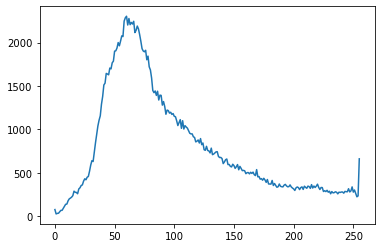

In [25]:
src = cv2.imread('./fig/flowers.jpg', 0)

hist = cv2.calcHist([src], [0], None, [256], [0,256])

cv2.imshow('src', src)

plt.plot(hist)

cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
src = cv2.imread('./fig/puppy_shrink.png',0)
src_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX)
src_equal = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('norm', src_norm)
cv2.imshow('equal', src_equal)

cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
src = cv2.imread('./fig/spring_in_park.jpg', cv2.IMREAD_REDUCED_COLOR_2)
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h,s,v = cv2.split(src_hsv)

v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX)
v_equal = cv2.equalizeHist(v)

src_norm = cv2.merge((h,s,v_norm))
src_equal = cv2.merge((h,s,v_equal))

src_norm = cv2.cvtColor(src_norm, cv2.COLOR_HSV2BGR)
src_equal = cv2.cvtColor(src_equal, cv2.COLOR_HSV2BGR)

cv2.imshow('src', src)
cv2.imshow('src_norm', src_norm)
cv2.imshow('src_equal', src_equal)

cv2.waitKey()
cv2.destroyAllWindows()

In [24]:
def call_track(pos):
    h_min = cv2.getTrackbarPos('h_min', 'src')
    h_max = cv2.getTrackbarPos('h_max', 'src')
    dst = cv2.inRange(src_hsv, (h_min, 150, 0), (h_max, 255, 255))
    cv2.imshow('dst', dst)

src = cv2.imread('./fig/palette.png', cv2.IMREAD_REDUCED_COLOR_2)
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# dst_bgr = cv2.inRange(src, (100, 0, 0), (255, 50, 50))
# dst_hsv = cv2.inRange(src_hsv, (110, 200, 150), (130, 255, 255))

cv2.imshow('src', src)
cv2.createTrackbar('h_min', 'src', 0, 179, call_track)
cv2.createTrackbar('h_max', 'src', 10, 179, call_track)
# cv2.imshow('dst_bgr', dst_bgr)
# cv2.imshow('dst_hsv', dst_hsv)

cv2.waitKey()
cv2.destroyAllWindows()

# 2022-05-03
## Backprojection

In [38]:
src = cv2.imread('./fig/green.png',
                 cv2.IMREAD_REDUCED_COLOR_2)
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)

x,y,w,h = cv2.selectROI(src)
# print(x,y,w,h)
crop = src_ycrcb[y:y+h, x:x+w]

channels = [1,2]
hist_size = [256,256]
hist_range = [0,256, 0,256]
hist = cv2.calcHist([crop], channels, None,
                    hist_size, hist_range)

backproj = cv2.calcBackProject([src_ycrcb], channels,
                               hist, hist_range, 1)

dst = cv2.copyTo(src, backproj)

cv2.imshow('src', src)
# cv2.imshow('crop', crop)
cv2.imshow('backproj', backproj)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

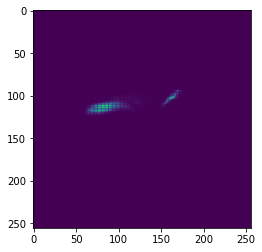

In [34]:
# joint Histogram
plt.imshow(hist)
plt.show()

In [89]:
src = cv2.imread('./fig/cat.bmp',1)
if src is None:
    print('image read failed')
    sys.exit()
    
src_ycrcb = cv2.cvtColor(src, cv2.COLOR_BGR2YCR_CB)

x,y,w,h = cv2.selectROI(src)
crop = src_ycrcb[y:y+h, x:x+w]

channels = [1,2]
hist_size = [256,256]
hist_range = [0,256, 0,256]

hist = cv2.calcHist([crop], channels, None,
                   hist_size, hist_range)
backproj = cv2.calcBackProject([src_ycrcb], channels,
                               hist, hist_range,1)
mask_blur = cv2.GaussianBlur(backproj,(0,0),1)
_, mask = cv2.threshold(mask_blur, 10, 255, cv2.THRESH_BINARY)

dst = cv2.copyTo(src, mask)

cv2.imshow('src',src)
cv2.imshow('mask', mask)
cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [73]:
cv2.destroyAllWindows()

# Convolution

In [84]:
## 평균 필터
src = cv2.imread('./fig/blue_eyes.png',
                cv2.IMREAD_REDUCED_COLOR_2)

kernel_3 = np.ones((3,3), np.float32)/9
kernel_5 = np.ones((5,5), np.float32)/25

dst_3 = cv2.filter2D(src, -1, kernel_3)
dst_5 = cv2.filter2D(src, -1, kernel_5)
dst_3_blur = cv2.blur(src, (3,3))
dst_5_blur = cv2.blur(src, (5,5))

cv2.imshow('src',src)
cv2.imshow('dst_3',dst_3)
cv2.imshow('dst_5',dst_5)
cv2.imshow('dst_3_blur',dst_3_blur)
cv2.imshow('dst_5_blur',dst_5_blur)


cv2.waitKey()
cv2.destroyAllWindows()

In [85]:
src = cv2.imread('./fig/blue_eyes.png',
                cv2.IMREAD_REDUCED_COLOR_2)

cv2.imshow('src',src)

for ksize in (3,5,7,9):
    dst = cv2.blur(src, (ksize,ksize))
    text = '{}x{}'.format(ksize,ksize)
    cv2.putText(dst, text, (30,30), cv2.FONT_HERSHEY_PLAIN,
               1, (0,0,255), 2, cv2.LINE_AA)
    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()

In [87]:
## 가우시안 필터
src = cv2.imread('./fig/blue_eyes.png',
                cv2.IMREAD_REDUCED_COLOR_2)

dst_blur = cv2.blur(src, (5,5))
dst_gaussian = cv2.GaussianBlur(src, (0,0), 1)

cv2.imshow('src',src)
cv2.imshow('dst_blur', dst_blur)
cv2.imshow('dst_gaussian', dst_gaussian)

cv2.waitKey()
cv2.destroyAllWindows()

In [92]:
# 잡음제거 필터(Median filter)
src = cv2.imread('./fig/blue_eyes.png',
                 cv2.IMREAD_REDUCED_GRAYSCALE_2)


salt_pepper_noise1 = np.random.choice((0,255), src.shape,
                                     p = (0.99, 0.01))
salt_pepper_noise2 = np.random.choice((0,255), src.shape,
                                      p = (0.99, 0.01))

src_noise =src + salt_pepper_noise1 - salt_pepper_noise2
src_noise = np.clip(src_noise,0,255).astype(np.uint8)

dst = cv2.medianBlur(src_noise, 3)

cv2.imshow('src', src)
cv2.imshow('src_noise', src_noise)
cv2.imshow('dst', dst)
                                      
cv2.waitKey()
cv2.destroyAllWindows()

# bilateral filter

In [97]:
src = cv2.imread('./fig/blue_eyes.png',cv2.IMREAD_REDUCED_GRAYSCALE_2)

dst_gaussian = cv2.GaussianBlur(src, (0,0), 5.0)

dst_bilateral = cv2.bilateralFilter(src, -1, 10, 5.0)

cv2.imshow('src', src)
cv2.imshow('dst_gaussian', dst_gaussian)
cv2.imshow('dst_bilateral', dst_bilateral)

cv2.waitKey()
cv2.destroyAllWindows()

In [99]:
src = cv2.imread('./fig/PD_MRI.jpeg',0)

dst_gaussian = cv2.GaussianBlur(src, (0,0), 3)

dst_bilateral = cv2.bilateralFilter(src, -1, 10, 3)

cv2.imshow('src', src)
cv2.imshow('gaussian', dst_gaussian)
cv2.imshow('bilateral', dst_bilateral)

cv2.waitKey()
cv2.destroyAllWindows()

# sobel filter

In [111]:
src = cv2.imread('./fig/son.jpg', 0)

dx = cv2.Sobel(src, cv2.CV_32F, 1, 0, delta=128)
dy = cv2.Sobel(src, cv2.CV_32F, 0, 1, delta=128)
mag = np.clip(cv2.magnitude(dx,dy),0,255).astype(np.uint8)
_, thres = cv2.threshold(mag, 230, 255, cv2.THRESH_BINARY)

cv2.imshow('src', src)
cv2.imshow('mag', mag)
cv2.imshow('thres', thres)
cv2.waitKey()
cv2.destroyAllWindows()

In [120]:
src = cv2.imread('./fig/son.jpg')

gaussian = cv2.GaussianBlur(src, (0,0), 1)
edge = 255 - cv2.Canny(src, 100, 200)
edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

dst = cv2.bitwise_and(gaussian, edge)

cv2.imshow('src', src)
cv2.imshow('gaussian', gaussian)
cv2.imshow('edge', edge)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [129]:
src = cv2.imread('./fig/cat.bmp')

gaussian = cv2.bilateralFilter(src, -1, 10, 1)
edge = 255 - cv2.Canny(src, 180, 200)
edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

dst = cv2.bitwise_and(gaussian, edge)

cv2.imshow('src', src)
cv2.imshow('edge', edge)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

In [131]:
src = cv2.imread('./fig/cat.bmp')

time = cv2.TickMeter()
time.start()


gaussian = cv2.bilateralFilter(src, -1, 10, 1)
edge = 255 - cv2.Canny(src, 180, 200)
edge = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)

dst = cv2.bitwise_and(gaussian, edge)

time.stop()
print(time.getTimeMilli(),'ms')

cv2.imshow('src', src)
cv2.imshow('edge', edge)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()

7.0318000000000005 ms


In [135]:
src = cv2.imread('./fig/puppy.bmp')

M = np.array([[1,0,100],
             [0,1,-100]], dtype=np.float32)
dst = cv2.warpAffine(src, M, (0,0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [142]:
src = cv2.imread('./fig/rose.jpg')
print(src.shape)
dst1 = cv2.resize(src, (900, 700), interpolation = cv2.INTER_NEAREST)
dst2 = cv2.resize(src, (900, 700), interpolation = cv2.INTER_LINEAR)
dst3 = cv2.resize(src, (900, 700), interpolation = cv2.INTER_CUBIC)
dst4 = cv2.resize(src, (900, 700), interpolation = cv2.INTER_LANCZOS4)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.imshow('dst3', dst3)
cv2.imshow('dst4', dst4)

cv2.waitKey()
cv2.destroyAllWindows()

(461, 600, 3)


In [146]:
src = cv2.imread('./fig/puppy.bmp')

# rad = 20*np.pi/180
# M = np.array([[np.cos(rad), np.sin(rad), 0],
#              [-np.sin(rad), np.cos(rad), 0]], dtype=np.float32)
h,w = src.shape[:2]
cp = (w/2, h/2)
M = cv2.getRotationMatrix2D(cp, -20, 1)

dst = cv2.warpAffine(src, M, (0,0))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [163]:
src = cv2.imread('./fig/puppy.bmp')

M = np.array([[1,0,0],
             [0.2,1,0]], dtype=np.float32)
h,w = src.shape[:2]
dst = cv2.warpAffine(src, M, (w, int(w*0.2)+h))

cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [164]:
src = cv2.imread('./fig/checkerboard.png')

h,w = src.shape[:2]

src_point = np.array([[217,50],[691,47],[830,517],[67,526]],
                     dtype = np.float32)
dst_point = np.array([[0,0],[w-1,0],[w-1,h-1],[0,h-1]],
                     dtype = np.float32)

pers = cv2.getPerspectiveTransform(src_point, dst_point)
dst = cv2.warpPerspective(src, pers, (w,h))

cv2.imshow('src', src)
cv2.imshow('dst', dst)

cv2.waitKey()
cv2.destroyAllWindows()